In [2]:
import pandas as pd

DATA_IN_PATH = r'C:\Users\Owner\Desktop\khh\SeoulICT\한국어 대화 데이터셋\KETI_대화데이터_일상_오피스'

data = pd.read_csv(DATA_IN_PATH + './Chatbot_data-master/ChatBotData.csv', encoding='utf-8')

In [3]:
print(data.head())

                 Q            A  label
0           12시 땡!   하루가 또 가네요.      0
1      1지망 학교 떨어졌어    위로해 드립니다.      0
2     3박4일 놀러가고 싶다  여행은 언제나 좋죠.      0
3  3박4일 정도 놀러가고 싶다  여행은 언제나 좋죠.      0
4          PPL 심하네   눈살이 찌푸려지죠.      0


### 데이터 길이 분석
데이터 길이를 분석하기 위해 두 데이터를 하나의 리스트로 만들기

In [4]:
sentences = list(data['Q']) + list(data['A'])

In [10]:
from konlpy.tag import Okt
tokenized_sentences = [s.split() for s in sentences]
sent_len_by_token = [len(t) for t in tokenized_sentences]
sent_len_by_eumjeol = [len(s.replace(' ', '')) for s in sentences]

from konlpy.tag import Twitter

okt = Okt()

morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in sentences]
sent_len_by_morph = [len(t) for t in morph_tokenized_sentences]

Text(0, 0.5, 'Number of Senteces')

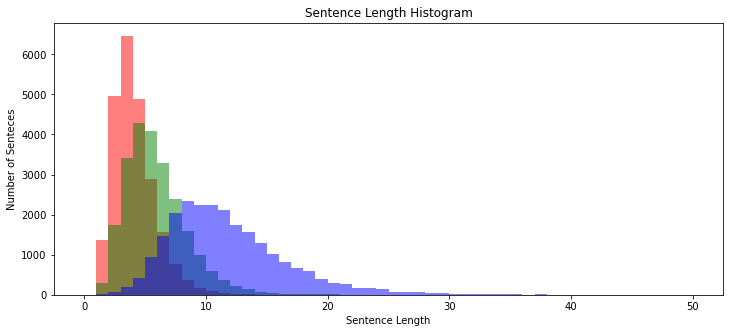

In [12]:
# 각 기준으로 나눈 후 측정한 값 그래프로 비교
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')    # 어절
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')    # 형태소
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')    # 음절
plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Senteces')

Text(0, 0.5, 'Number of Senteces')

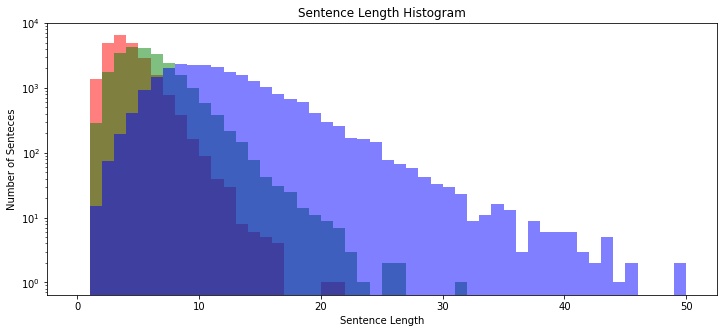

In [13]:
# 그래프의 y값 크기를 조정
plt.figure(figsize=(12,5))
plt.hist(sent_len_by_token, bins=50, range=[0,50], alpha=0.5, color='r', label='eojeol')    # 어절
plt.hist(sent_len_by_morph, bins=50, range=[0,50], alpha=0.5, color='g', label='morph')    # 형태소
plt.hist(sent_len_by_eumjeol, bins=50, range=[0,50], alpha=0.5, color='b', label='eumjeol')    # 음절

# 이것만 위에 코드에서 추가했다.
# log : 각 그래프가 가지는 y값의 스케일을 조정함으로써
# 차이가 큰 데이터에 대해서도 함께 비교할 수 있게 한다.
plt.yscale('log')

plt.title('Sentence Length Histogram')
plt.xlabel('Sentence Length')
plt.ylabel('Number of Senteces')

어절에 대한 각 통곗값 출력

In [15]:
import numpy as np

print("어절 최대 길이 :{}".format(np.max(sent_len_by_token)))
print("어절 최소 길이 :{}".format(np.min(sent_len_by_token)))
print("어절 평균 길이 :{:.2f}".format(np.mean(sent_len_by_token)))
print("어절 길이 표준편차 :{:.2f}".format(np.std(sent_len_by_token)))
print("어절 중간 길이 :{}".format(np.median(sent_len_by_token)))
print("제1사분위 길이 :{}".format(np.percentile(sent_len_by_token, 25)))
print("제3사분위 길이 :{}".format(np.percentile(sent_len_by_token, 75)))

어절 최대 길이 :21
어절 최소 길이 :1
어절 평균 길이 :3.64
어절 길이 표준편차 :1.74
어절 중간 길이 :3.0
제1사분위 길이 :2.0
제3사분위 길이 :5.0


형태소 통곗값 출력

In [16]:
print("형태소 최대 길이 :{}".format(np.max(sent_len_by_morph)))
print("형태소 최소 길이 :{}".format(np.min(sent_len_by_morph)))
print("형태소 평균 길이 :{:.2f}".format(np.mean(sent_len_by_morph)))
print("형태소 길이 표준편차 :{:.2f}".format(np.std(sent_len_by_morph)))
print("형태소 중간 길이 :{}".format(np.median(sent_len_by_morph)))
print("제1사분위 길이 :{}".format(np.percentile(sent_len_by_morph, 25)))
print("제3사분위 길이 :{}".format(np.percentile(sent_len_by_morph, 75)))

형태소 최대 길이 :31
형태소 최소 길이 :1
형태소 평균 길이 :5.41
형태소 길이 표준편차 :2.56
형태소 중간 길이 :5.0
제1사분위 길이 :4.0
제3사분위 길이 :7.0


음절 통곗값 출력

In [17]:
print("음절 최대 길이 :{}".format(np.max(sent_len_by_eumjeol)))
print("음절 최소 길이 :{}".format(np.min(sent_len_by_eumjeol)))
print("음절 평균 길이 :{:.2f}".format(np.mean(sent_len_by_eumjeol)))
print("음절 길이 표준편차 :{:.2f}".format(np.std(sent_len_by_eumjeol)))
print("음절 중간 길이 :{}".format(np.median(sent_len_by_eumjeol)))
print("제1사분위 길이 :{}".format(np.percentile(sent_len_by_eumjeol, 25)))
print("제3사분위 길이 :{}".format(np.percentile(sent_len_by_eumjeol, 75)))

음절 최대 길이 :57
음절 최소 길이 :1
음절 평균 길이 :11.31
음절 길이 표준편차 :4.98
음절 중간 길이 :10.0
제1사분위 길이 :8.0
제3사분위 길이 :14.0


전체 데이터를 한 눈에 보기 쉽게 박스 플롯으로 추력

{'whiskers': [<matplotlib.lines.Line2D at 0x22e35ffcc10>,
 'caps': [<matplotlib.lines.Line2D at 0x22e35febdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e35ffc160>,
 'medians': [<matplotlib.lines.Line2D at 0x22e35ffac70>,
 'fliers': [<matplotlib.lines.Line2D at 0x22e34fea520>,
 'means': [<matplotlib.lines.Line2D at 0x22e34feaa90>,
  <matplotlib.lines.Line2D at 0x22e356a3580>]}

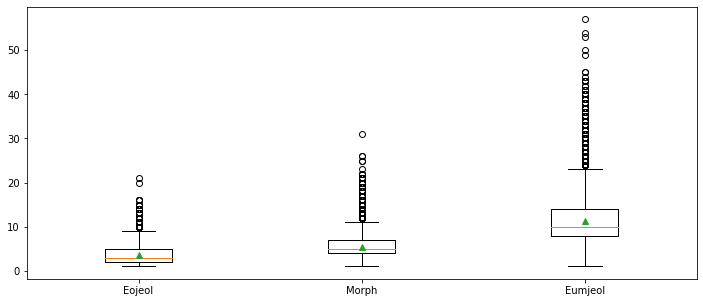

In [18]:
plt.figure(figsize=(12, 5))
plt.boxplot([sent_len_by_token, sent_len_by_morph, sent_len_by_eumjeol],
           labels=['Eojeol', 'Morph', 'Eumjeol'],
           showmeans=True)

### 질문, 답변 각각에 대한 문장 길이 분포 분석

In [20]:
# 형태소 기준으로 길이 분석
query_sentences = list(data['Q'])
answer_sentences = list(data['A'])

query_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in query_sentences]
query_sent_len_by_morph = [len(t) for t in query_morph_tokenized_sentences]

answer_morph_tokenized_sentences = [okt.morphs(s.replace(' ', '')) for s in answer_sentences]
answer_sent_len_by_morph = [len(t) for t in answer_morph_tokenized_sentences]

Text(0, 0.5, 'Number of Queries')

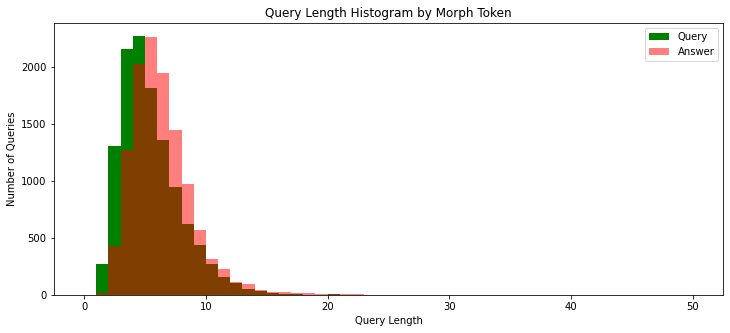

In [21]:
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0, 50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0, 50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

C:\Users\Owner\AppData\Local\Temp/ipykernel_15316/1485063582.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of Queries')

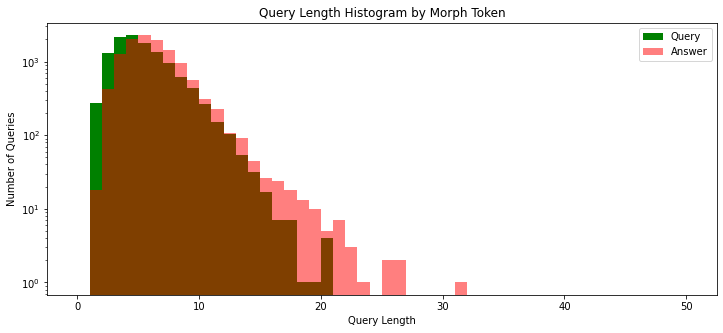

In [22]:
# y값 크기 조정해서 히스토그램 다시 그려보기
plt.figure(figsize=(12, 5))
plt.hist(query_sent_len_by_morph, bins=50, range=[0, 50], color='g', label='Query')
plt.hist(answer_sent_len_by_morph, bins=50, range=[0, 50], color='r', alpha=0.5, label='Answer')
plt.legend()
plt.yscale('log', nonposy='clip')
plt.title('Query Length Histogram by Morph Token')
plt.xlabel('Query Length')
plt.ylabel('Number of Queries')

{'whiskers': [<matplotlib.lines.Line2D at 0x22e36b00610>,
 'caps': [<matplotlib.lines.Line2D at 0x22e36b00d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x22e36b00250>,
 'medians': [<matplotlib.lines.Line2D at 0x22e36b21490>,
 'fliers': [<matplotlib.lines.Line2D at 0x22e36b21820>,
 'means': []}

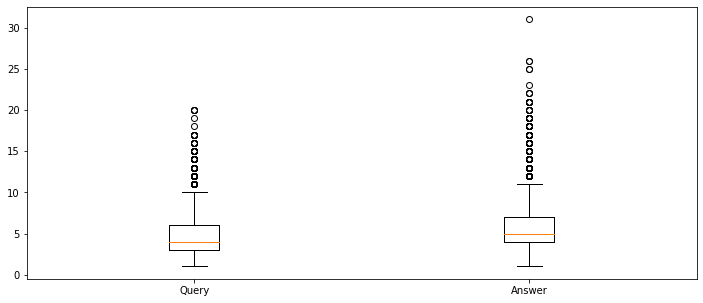

In [23]:
# 두 데이터 박스 플롯
plt.figure(figsize=(12, 5))
plt.boxplot([query_sent_len_by_morph, answer_sent_len_by_morph], labels=['Query', 'Answer'])

### 데이터 어휘 빈도 분석

In [24]:
okt.pos('오늘밤은유난히덥구나')

[('오늘밤', 'Noun'), ('은', 'Josa'), ('유난히', 'Adverb'), ('덥구나', 'Adjective')]

In [25]:
# 각 문장에서 명사, 형용사, 통사를 제외한 단어를 모두 제거한 문자열
query_NVA_token_sentences = list()
answer_NVA_token_sentences = list()

for s in query_sentences:
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            query_NVA_token_sentences.append(token)
            
for s in answer_sentences:
    temp_token_bucket = list()
    for token, tag in okt.pos(s.replace(' ', '')):
        if tag == 'Noun' or tag == 'Verb' or tag == 'Adjective':
            answer_NVA_token_sentences.append(token)
            
query_NVA_token_sentences = ' '.join(query_NVA_token_sentences)
answer_NVA_token_sentences = ' '.join(answer_NVA_token_sentences)

# 시퀀스 투 시퀀스 모델

### preprocess.py

In [26]:
import os, re, json

import numpy as np
import pandas as pd
from tqdm import tqdm

from konlpy.tag import Okt

FILTERS = "([~.,!?\"':;)(])"
PAD = "<PAD>"    # 어떤 의미도 없틑 패딩 토큰
STD = "<SOS>"    # 시작 토큰
END = "<END>"    # 종료 토큰
UNK = "<UNK>"    # 사전에 없는 단어
PAD_INDEX = 0
STD_INDEX = 1
END_INDEX = 2
UNK_INDEX = 3

MARKER = [PAD, STD, END, UNK]
CHANGE_FILTER = re.compile(FILTERS)

MAX_SEQUENCE = 25

In [27]:
# 데이터를 판다스를 통해 불러오는 함수
def load_data(path):
    data_df = pd.read_csv(path, header=0)
    question, answer = list(data_df['Q']), list(data_df['A'])
    
    return question, answer

In [28]:
# 단어 사전을 만들기 위해 데이터를 전처리한 후 단어 리스트로 먼저 만드는 함수
def data_tokenizer(data):
    words = []
    for sentence in data:
        sentence = re.sub(CHANGE_FILTER, "", sentence)
        for word in sentence.split():
            words.append(word)
    return [word for word in words if word]

In [29]:
# 한글 텍스트를 토크나이징하기 위해 형태로소 분리하는 함수
def prepro_like_morphlized(data):
    morph_analyzer = Okt()
    result_data = list()
    for seq in tqdm(data):
        morphlized_seq = " ".join(morph_analyzer.morphs(seq.replace(' ', '')))
        result_data.append(morphlized_seq)
        
    return result_data

In [30]:
# 단어 사전을 만드는 함수
def load_vocabulary(path, vocab_path, tokenize_as_morph=False):
    vocabulary_list = []
    if not os.path.exists(vocab_path):
        if os.path.exists(path):
            data_df = pd.read_csv(path, encoding='utf-8')
            question, answer = list(data_df['Q']), list(data_df['A'])
            if tokenize_as_morph:
                question = prepro_like_morphlized(question)
                answer = prepro_like_morphlized(answer)
                
            data = []
            data.extend(question)
            data.extend(answer)
            words = data_tokenizer(data)
            words = list(set(words))
            words[:0] = MARKER
            
        with open(vocab_path, 'w', encoding='utf-8') as vocabulary_file:
            for word in words:
                vocabulary_file.write(word + '\n')
                
    with open(vocab_path, 'r', encoding='utf-8') as vocabulary_file:
        for line in vocabulary_file:
            vocabulary_list.append(line.strip())
    word2idx, idx2word = make_vocabulary(vocabulary_list)
    
    return word2idx, idx2word, len(word2idx)

In [31]:
def make_vocabulary(vocabulary_list):
    # 리스트를 키가 단어이고 값이 인덱스인 딕셔너리를 만든다
    word2idx = {word: idx for idx, word in enumerate(vocabulary_list)}
    # 리스트를 키가 인덱스이고 값이 단어인 딕셔너리를 만든다
    idx2word = {idx: word for idx, word in enumerate(vocabulary_list)}
    # 두 개의 딕셔너리를 넘겨 준다
    return word2idx, idx2word

word2idx, idx2word, vocab_size = load_vocabulary(PATH, VOCAB_PATH)

NameError: name 'PATH' is not defined

In [33]:
# 인코더에 적용될 입력값을 만드는 전처리 함수
def enc_processing(value, dictionary, tokenize_as_morph=False):
    sequences_input_index = []
    sequences_length = []
    
    if tokenize_as_morph:
        value = prepro_like_morphlized(value)
    
    for sequence in value:
        sequence = re.sub(CHANGE_FILTER, """""", sequence)
        sequence_index = []
        for word in sequence.split():
            if dictionary.get(word) is not None:
                sequence_index.extend([dictionary[word]])
            else:
                sequence_index.extend([dictionary[UNK]])
                
        if len(sequence_index) > MAX_SEQUENCE:
            sequence_index += sequence_index[:MAX_SEQUENCE]
            
        sequences_length.append(len(sequence_index))
        sequence_index += (MAX_SEQUENCE - len(sequence_index)) * [dictionary[PAD]]
        
        sequence_input_index.append(sequence_index)
        
    return np.asarray(sequences_input_index), sequences_length